In [29]:
# 酷狗音乐周杰伦歌词抓取
# 第一步 储存专辑列表
import requests
import json
headers = {
    'User-Agent':'chrome',
}
url = 'http://www.kuwo.cn/api/www/artist/artistAlbum?artistid=336&pn=1&rn=50' # 因为酷狗周总专辑列表 32 个，所以一次请求就可以获取完毕
r = requests.get(url, headers=headers)
r.json()
with open(r'C:\Users\yc\Desktop\zhoujl\albumlist.json', 'w', encoding='utf8') as f:
    json.dump(r.json(),f)

In [68]:
# 第二步 歌曲信息，储存歌词(去除演唱会周总唱歌的重复曲目, 剩189首歌曲)
from bs4 import BeautifulSoup
import requests
import json
import re
lyric = []
headers = {
    'User-Agent':'chrome',
}
with open(r'C:\Users\yc\Desktop\zhoujl\albumlist.json', 'r', encoding='utf8') as f:
    albums = json.load(f)
for album in albums['data']['albumList']: # 专辑列表
    albumid = album['albumid']
    if albumid in {552654, 60643, 16943, 12478, 1291, 1288}: # 去除演唱会专辑
        continue
    url2 = 'http://www.kuwo.cn/album_detail/' + str(albumid)
    r2 = requests.get(url2, headers=headers)
    soup = BeautifulSoup(r2.text)
    res = soup.script.string
    songlist = re.findall(r'rid:(\d+),isListenFee', res) # 歌曲 id 列表
    for song in songlist:
        url3 = 'http://m.kuwo.cn/newh5/singles/songinfoandlrc?musicId=' + str(song)
        r3 = requests.get(url3, headers=headers)  # 歌词在这里
        lyric.append(r3.json())
print(len(lyric))
with open(r'C:\Users\yc\Desktop\zhoujl\lyriclist.json', 'w', encoding='utf8') as f: # 使用 json 序列化列表
    json.dump(lyric,f)

189


In [116]:
# 第三步 保存歌词（对可能还存在重的live歌曲清除）(其中没有歌词的歌曲：专辑 黄俊郎的黑 为钢琴曲)
with open(r'C:\Users\yc\Desktop\zhoujl\lyriclist.json', 'r', encoding='utf8') as f:
    lyric = json.load(f)
c = 0
print(len(lyric))
title= {'魔术先生（Live）', '英雄-(游戏《英雄联盟》主题曲)'} # 去重集合
for i,ly in enumerate(lyric): # 歌曲列表
    a = ''
    cc = False
    if ly['data']['lrclist']==None: # 有的歌曲没有内容
        c+=1
        continue
    for i2,line in enumerate(ly['data']['lrclist']): # 歌词列表
        if i2==0: # 去重
            t = re.findall(r'(\S+)\(Live\)|(\S+)-', line['lineLyric'].replace(' ',''))
            if t==[]:
                t = ly['data']['songinfo']['songName'] # 对于第一行不是歌名的曲子,从属性中提取
            for tt in t[0]:
                if tt !='' and tt not in title:
                    title.add(tt) # 歌曲名
                    cc = True
        if cc:
            a+=(line['lineLyric'] + '。') # 拼截歌词
        else:
            break
    with open(r'C:\Users\yc\Desktop\zhoujl\zjl.text', 'a+', encoding='utf8') as f:
        f.write(a)
        f.write('\n\n')
print('共:', i+1, 'None:', c)

189
22222222 {'data': {'lrclist': [{'time': '1.68', 'lineLyric': '该歌曲为纯音乐请欣赏谢谢！'}], 'songinfo': {'album': '黄俊郎的黑', 'albumId': '411140', 'artist': '杨瑞代', 'artistId': '1865', 'coopFormats': ['320kmp3', '192kmp3', '128kmp3'], 'copyRight': '0', 'duration': '246', 'formats': 'WMA96|WMA128|MP3H|MP3192|MP3128|ALFLAC|AL|AAC48|AAC24', 'hasEcho': None, 'hasMv': '0', 'id': '3914592', 'isExt': None, 'isNew': None, 'isPoint': '0', 'isbatch': None, 'isdownload': '0', 'isstar': '0', 'mkvNsig1': '0', 'mkvNsig2': '0', 'mkvRid': 'MV_0', 'mp3Nsig1': '3186317984', 'mp3Nsig2': '1582587341', 'mp3Rid': 'MP3_3914592', 'mp3Size': '', 'mp4sig1': '', 'mp4sig2': '', 'musicrId': 'MUSIC_3914592', 'mutiVer': '0', 'mvpic': None, 'nsig1': '1882886105', 'nsig2': '1783085919', 'online': '1', 'params': None, 'pay': '16711935', 'pic': 'http://img1.kwcdn.kuwo.cn/star/albumcover/240/75/78/488067191.jpg', 'playCnt': '', 'rankChange': None, 'reason': None, 'score': None, 'score100': '30', 'songName': '准备中', 'songTimeMinutes':

In [108]:
print(len(title),title) # 共以下 182 首歌曲歌词
# 检查集合中是否有重复
z = {}
for i in title:
    if i == 1:
        continue
    z[i[:2]] = i       

182 {'巴黎恋人', '曾经小太阳', '魔术先生（Live）', '忍者', '双截棍(Demo)', '手语', '园游会', '蓝色风暴', '一点点', '一路向北-(电影《头文字D》插曲)', '前世情人', '青花瓷', '说好的幸福呢', '晴天', '爸，我回来了(DEMO)', '纯爱', '梯田', '世界未末日', '四季列车', '乌克丽丽', '时光机(《2008ELLE风尚大典》主题曲)', '你好吗', '不该(WithaMEI)-(电视剧《幻城》主题曲)', '以父之名', '困兽之斗', '我不配', '双截棍(《青蜂侠》电影片尾曲)', '迷魂曲', '反方向的钟(ClockThatGoesBackwards)', '发如雪(Snowyhair)', '将军', '英雄', '简单爱', '好久不见', '无双', '告白气球', '傻笑', '床边故事', 'Try(尝试)(《功夫熊猫3》电影全球主题曲)', '迷迭香', '听妈妈的话', '止战之殇', '明明就', '三年二班', '爸，我回来了', '公主病', '不爱我就拉倒', '黑色幽默', '雨下一整晚', '听爸爸的话', '夜曲', '逆鳞', '烟花易冷', '我落泪情绪零碎', '轨迹(Footprints)(《寻找周杰伦》电影主题曲)', '这', '天涯过客', '土耳其冰淇淋', '我的地盘(中国移动动感地带广告曲)', '分裂', '惊叹号', '最长的电影', 'NowYouSeeMe', '飘移', '霍元甲', '阳明山', '飘移-(电影《头文字D》主题曲)', '她的睫毛', '娘子', '千里之外-周杰伦(JayChou)/费玉清(Yu', '一路向北', '周大侠', '龙战骑士', '哪里都是你(《天台》电影主题曲)', '阳光宅男', '花海', '公', '同一种调调', '黑色毛衣', '算什么男人', '菊花台(ChrysanthemumTerrace)(《满城尽带黄金甲》电影片尾曲)', '嘻哈空姐', '蛇舞', '一口气全念对', '四面楚歌', '乱舞春秋', '比较大的大提琴', '美人鱼(Mermaid)', '献世', '搁浅', '兰亭序', '乔克叔叔', '牛仔很忙', '爱情废柴', '梦想启动',

In [110]:
# 结巴分词
# 这是使用分词后的权重绘制词云，或者使用分词后的文本绘制,弹幕词云
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
#显示图形
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

# 数据生成---------------------------
jieba.load_userdict(r'C:\Users\yc\Desktop\jieba2.txt')
jieba.analyse.set_stop_words(r'C:\Users\yc\Desktop\stop2.txt') 
with open(r'C:\Users\yc\Desktop\zhoujl\zjl.text', 'rb' ) as f:
    sentence = f.read()
a = jieba.analyse.extract_tags(sentence, topK=300, withWeight=True, allowPOS=())
print(a)
print(len(a))

[('Jay', 0.06367455085336249), ('Chou', 0.059533116651517774), ('Hey', 0.03779058709183302), ('Oh', 0.034166832165218895), ('oh', 0.028472360137682413), ('回忆', 0.02740785944398476), ('哎哟', 0.023449912082717708), ('微笑', 0.022981361855602997), ('La', 0.019671812458762396), ('爱情', 0.019279856810252023), ('双截棍', 0.017083416082609448), ('Go', 0.01604805753214827), ('公公', 0.014824134413042912), ('眼泪', 0.013475454379200624), ('音乐', 0.0132059402948833), ('忘记', 0.013039457389352617), ('温柔', 0.012907286115814315), ('故事', 0.012721516436814618), ('Fa', 0.012424302605534145), ('ya', 0.012424302605534145), ('永远', 0.012396429748718659), ('可爱', 0.01220634839509635), ('慢慢', 0.012156040473524445), ('过去', 0.01214898693494349), ('come', 0.011906623330303555), ('画面', 0.011812147263155501), ('世界', 0.011536798758921319), ('思念', 0.011434396104530379), ('远方', 0.011371900260408782), ('纯白', 0.011296650228640712), ('沉默', 0.0111834853620582), ('等待', 0.011175951164358896), ('不想', 0.011105881575677044), ('天空', 0.011

In [113]:
a = [('回忆', 0.02740785944398476), ('微笑', 0.022981361855602997), ('爱情', 0.019279856810252023), ('双截棍', 0.017083416082609448), ('Go', 0.01604805753214827), ('公公', 0.014824134413042912), ('眼泪', 0.013475454379200624), ('音乐', 0.0132059402948833), ('忘记', 0.013039457389352617), ('温柔', 0.012907286115814315), ('故事', 0.012721516436814618), ('永远', 0.012396429748718659), ('可爱', 0.01220634839509635), ('慢慢', 0.012156040473524445), ('过去', 0.01214898693494349), ('come', 0.011906623330303555), ('画面', 0.011812147263155501), ('世界', 0.011536798758921319), ('思念', 0.011434396104530379), ('远方', 0.011371900260408782), ('纯白', 0.011296650228640712), ('沉默', 0.0111834853620582), ('等待', 0.011175951164358896), ('不想', 0.011105881575677044), ('天空', 0.011063167424751656), ('笑容', 0.010452461694234617), ('快乐', 0.01028917152074828), ('know', 0.009835906229381198),('难过', 0.009772118999246526), ('妈妈', 0.009651437041226346), ('铃不铃', 0.009318226954150608), ('感动', 0.00921990091504352), ('心碎', 0.009101719327584116), ('安静', 0.009070242769117916), ('到底', 0.00904582099548781), ('飘移', 0.008965923995392542), ('不该', 0.008943614509782618), ('一切', 0.008870854869398086), ('从前', 0.008673433318570564), ('表情', 0.008649469276744468), ('一路', 0.008607972469641017), ('冰淇淋', 0.008461905939349586), ('跟着', 0.008355089800194), ('我的世界', 0.00828286840368943), ('不铃', 0.00828286840368943), ('check', 0.00828286840368943), ('甜蜜', 0.00825415429616334), ('吉他', 0.008086333880102195), ('幸福', 0.007959936182912571), ('味道', 0.007941164727341618), ('霍霍', 0.007909424329242628), ('打开', 0.007880680746204478), ('me', 0.00776518912845884), ('一二三四', 0.007761179365444075), ('阳光', 0.007722402877028104), ('女人', 0.007676328645043953), ('放弃', 0.00767043052222838), ('灵魂', 0.007659256076819816), ('勇气', 0.007649158276674317), ('功夫', 0.007522869881494825), ('看不见', 0.007471289748671893), ('伤心', 0.007439266059451782), ('一遍', 0.007411459653882129), ('外婆', 0.007398736017628719), ('月光', 0.007391421011587062), ('城堡', 0.007386806907017277), ('习惯', 0.007341306960453383), ('不再', 0.007338127260329104), ('麻烦', 0.007335203952442732), ('娘子', 0.007295794365140952), ('黄雨勋', 0.007247509853228251), ('钟兴民', 0.007247509853228251), ('哈兮', 0.007247509853228251), ('也许', 0.007226981825479583), ('一天', 0.007223293763305331), ('拥抱', 0.007211393282971896), ('变成', 0.007188511479879618), ('失去', 0.007127852996498939), ('斑鸠', 0.007116083207268868), ('想念', 0.006945152694478846), ('风景', 0.006917785728823886), ('豆腐', 0.006809688418178669), ('我爱你', 0.006760519932848915), ('try', 0.006729830577997662), ('美的', 0.006729830577997662), ('Do', 0.006729830577997662), ('半兽人', 0.006729830577997662), ('或许', 0.006714274598858528), ('温暖', 0.006686064347705365), ('声音', 0.0066831042880929285), ('秘密', 0.006652094862706448), ('生命', 0.006641740539211016), ('和弦', 0.0066330478053306195), ('分手', 0.006619603726914216), ('决定', 0.006577942693893387), ('简单', 0.006568711536082363), ('努力', 0.006520267309033039), ('默默', 0.006507385311242801), ('完美', 0.006495838744788465), ('哪里', 0.006439817886783008), ('回来', 0.006381993472633265), ('骄傲', 0.0063660873317213), ('美丽', 0.006325213629812065), ('孤独', 0.006324342652361321), ('弹琴', 0.006307770478034469), ('停留', 0.006300857648612134), ('回到', 0.006293824214895423), ('继续', 0.006282962749831551), ('黄俊郎', 0.006212151302767073), ('发如雪', 0.006212151302767073), ('透明', 0.006139898041285238), ('自由', 0.006132069274654657), ('千年', 0.006126861513558222), ('拥有', 0.0061106545295258295), ('谢谢', 0.0060659799485839865), ('距离', 0.00605895561117265), ('结局', 0.006034230318392586), ('轻轻地', 0.006000123998913956), ('开心', 0.005986665359851904), ('牵着', 0.0059848352058684455), ('一口', 0.005975759907811891), ('忍者', 0.005961036513224786), ('静静', 0.005956695271412116), ('叫做', 0.005919305017247651), ('是否', 0.005904597874829602), ('模样', 0.005829286605295977), ('活活', 0.005813910234512623), ('敲敲', 0.005777516537418265), ('电影', 0.005766145350695017), ('再见', 0.005752223231614775), ('一张', 0.005716056937475425), ('亲爱', 0.005714762722355692), ('嘴角', 0.00570524717533495), ('转身', 0.005702272961321613), ('see', 0.0056944720275364825), ('Girl', 0.0056944720275364825), ('铁盒', 0.0056944720275364825), ('暧昧', 0.00564759634635344), ('诱惑', 0.0056237664883038154), ('美人鱼', 0.00559399823461655), ('哼哼', 0.005550618686638375), ('欣赏', 0.005546335360155892), ('每天', 0.005542011819606807), ('期待', 0.005520102113924566), ('漂亮', 0.005476838211464946), ('刚好', 0.005474726429674793), ('冲冲', 0.005473545310873426), ('青春', 0.005473009326815918), ('原来', 0.005460238920690252), ('融化', 0.005455821747778548), ('童年', 0.005432388636140822), ('心跳', 0.005412246014946087), ('爷爷', 0.00539585630814013), ('蜻蜓', 0.005372692795599099), ('眼睛', 0.005335289513525311), ('印地安', 0.005322495881652449), ('醒来', 0.005321153583773438), ('浪花', 0.0052984253526661765), ('未来', 0.005281105549311913), ('情绪', 0.005245597379136534), ('寂寞', 0.005242973217665526), ('彻底', 0.005206569898767592), ('公主', 0.005201290017255445), ('乘着', 0.005184310700504481), ('Now', 0.005176792752305893), ('go', 0.005176792752305893), ('有话', 0.005176792752305893), ('Ah', 0.005176792752305893), ('记忆', 0.0051695854368891), ('土耳其', 0.005147795884945221), ('离别', 0.005134898197080501), ('太阳', 0.0051240841532615945), ('孤单', 0.005120882340714502), ('主题曲', 0.00511896943242541), ('撑伞', 0.00511896943242541), ('终于', 0.0051128103075711254), ('属于', 0.0051100036582618115), ('麦芽糖', 0.0051075590887974705), ('始终', 0.005075038330407915), ('凄美', 0.0050679656495907855), ('地心引力', 0.0050679656495907855), ('溪边', 0.005023117558072143), ('一只', 0.005020112442221885), ('弹奏', 0.005008269748372234), ('说好', 0.00498363446072143), ('冬天', 0.004921136094227688), ('胸口', 0.004913379752173386), ('地球', 0.004902647880675529), ('窗外', 0.004886059499623263), ('时光', 0.004881086918478327), ('夕阳', 0.004856875036345645), ('时空', 0.004851130689045165), ('旋律', 0.0048370211496734945), ('经过', 0.0048323758688858095), ('愿望', 0.004822049077051488), ('时差', 0.004808130896124366), ('爱过', 0.004808130896124366), ('心里', 0.004803113041190837), ('岁月', 0.004772597230524402), ('承诺', 0.004762457264363226), ('明白', 0.004745509511348893), ('遇见', 0.004737134237684146), ('落叶', 0.004734384825644134), ('反正', 0.004721622093351232), ('浪漫', 0.004714758639714199), ('梦想', 0.004698438850275841), ('想起', 0.004696663520413978), ('全都', 0.0046898915803126485), ('烦恼', 0.004689457288717794), ('任性', 0.004674353028297752), ('红尘', 0.004671097907904992), ('who', 0.004659113477075304), ('yourself', 0.004659113477075304), ('Yeah', 0.004659113477075304), ('雨下', 0.004659113477075304), ('如龙', 0.004659113477075304), ('洪敬尧', 0.004659113477075304), ('西元前', 0.004659113477075304), ('牛仔', 0.004643235535270428), ('看见', 0.004624408291318581), ('听见', 0.0046170320865179925), ('生活', 0.004615200968285195), ('相爱', 0.00461272097923873), ('还要', 0.004593702771558481), ('陆羽', 0.004564806864540769), ('燃烧', 0.0045507346030442125), ('纷飞', 0.0045466073140345556), ('就让', 0.004544186689912528), ('坚持', 0.0045322111502871), ('太快', 0.0045248624956948), ('依赖', 0.004523666208032737), ('手牵手', 0.0045201070900705844), ('水手', 0.004516273242521976), ('原谅', 0.004507061561089075), ('星空', 0.004505187301363617), ('天涯', 0.004488665362339237), ('小丑', 0.00446765630862166), ('害怕', 0.004458509395463561), ('烧肉', 0.004449051185198978), ('难道', 0.004440509803075824), ('舍不得', 0.0044398957453379816), ('后悔', 0.004438573167608366), ('受够', 0.004434959637396614), ('专心', 0.004432532606686008), ('尽头', 0.004427642612603386), ('紧紧', 0.004393148929147361), ('季节', 0.004366839671619105), ('深埋在', 0.004362085786086693), ('星星', 0.004316095581710475), ('作词', 0.004313306143467717), ('眼神', 0.0043123554102282085), ('制作', 0.004284957190512277), ('黑夜', 0.0042390375252258266), ('讯号', 0.0042322536123197505), ('恩怨', 0.0042322536123197505), ('默契', 0.004231471699941974), ('兄弟', 0.004229647381921795), ('清醒', 0.004221360841737756), ('颜色', 0.004218534363707617), ('副歌', 0.004213603410730524), ('飘逸', 0.004205180318689646), ('缘份', 0.0041948359009916425), ('面红', 0.0041948359009916425), ('脑海', 0.004177827406900359), ('跌倒', 0.004172223403203135), ('存在', 0.004156270282143075), ('人生', 0.004151534769772659), ('宇宙', 0.004147943691887152), ('没道理', 0.004147717058242757), ('cuz', 0.004141434201844715), ('let', 0.004141434201844715), ('key', 0.004141434201844715), ('what', 0.004141434201844715), ('巨炮', 0.004141434201844715), ('东风破', 0.004141434201844715), ('ah', 0.004141434201844715), ('Na', 0.004141434201844715), ('假装', 0.004119536069944571), ('琴声', 0.0041059355840211325), ('动嘴', 0.004095175545940328), ('那年', 0.0040870547193262025), ('代表', 0.0040807147230593685), ('准备', 0.004078455721445027), ('地盘', 0.0040721004072013164), ('分开', 0.004070014606360802), ('秋天', 0.004067535504895856), ('常青', 0.004066794082310657)]

常青 0.004066794082310657


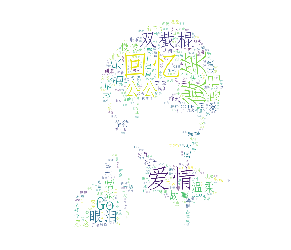

In [114]:
# 结巴分词
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

b = {}
for i,j in a:
    b[i] = j
print(i,j)

# wordcloud 部分设置
font_path = r'C:\Users\yc\Desktop\SIMFANG.ttf' # 字体 # wordcloud设置
back_coloring = np.array(Image.open(r'C:\Users\yc\Desktop\zhoujl\z.png').convert('L'))  # 设置背景图片


# 设置词云属性
wc = WordCloud(font_path=font_path,  # 设置字体
               background_color="white",  # 背景颜色
               max_words=2000,  # 词云显示的最大词数
               mask=back_coloring,  # 设置背景图片
#                contour_width=1, # 描边
               contour_color='green'
               )
# 根据频率生成词云
wc.generate_from_frequencies(b)
wc.to_file(r'C:\Users\yc\Desktop\zhoujl\6666.png') # 保存文件
# 显示图片
plt.figure()
plt.imshow(wc)
plt.axis("off")

plt.show()

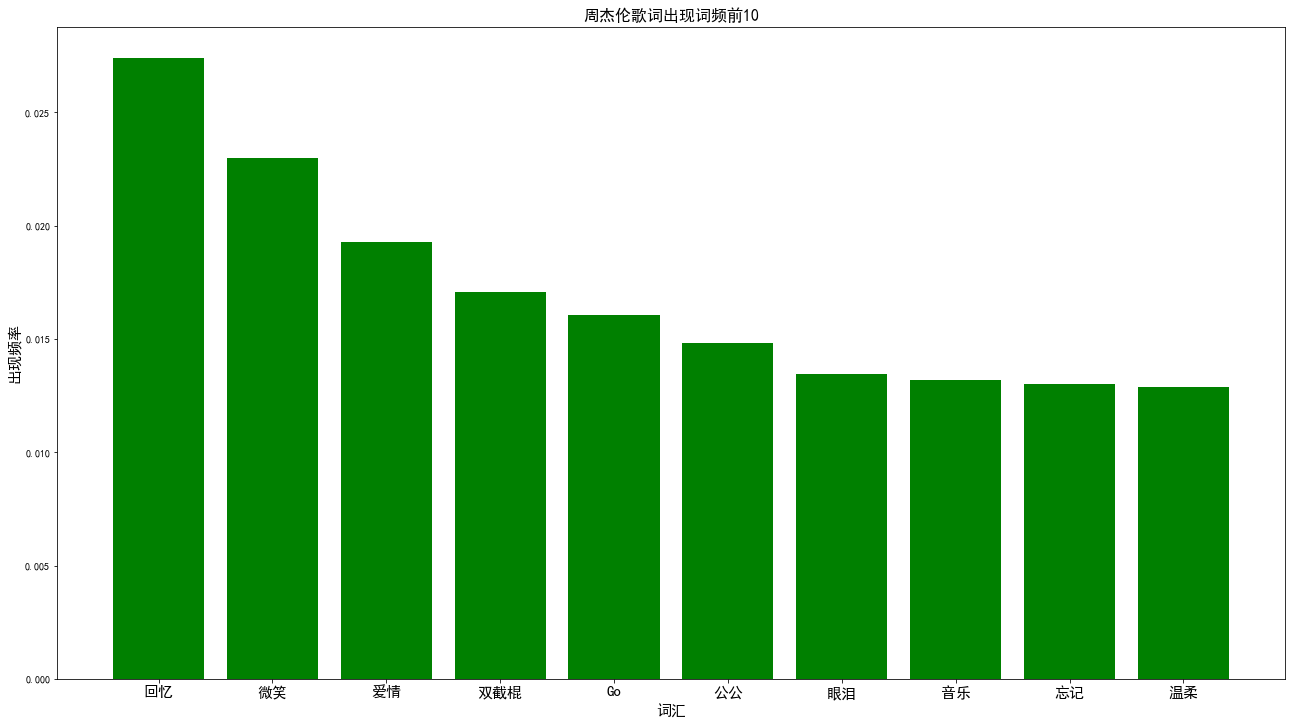

In [115]:
# 高频词汇分布
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle

#显示图形
%matplotlib inline 
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['figure.figsize'] = (22.0, 12.0) # 设置figure_size尺寸

x,y = [],[]
a = [('回忆', 0.02740785944398476), ('微笑', 0.022981361855602997), ('爱情', 0.019279856810252023), ('双截棍', 0.017083416082609448), ('Go', 0.01604805753214827), ('公公', 0.014824134413042912), ('眼泪', 0.013475454379200624), ('音乐', 0.0132059402948833), ('忘记', 0.013039457389352617), ('温柔', 0.012907286115814315)]
for a1 in a:
    x.append(a1[0])
    y.append(a1[1])
    
rects = plt.bar(range(len(y)), y, width=0.8, fc='g') # 条形图

plt.xticks(range(len(x)), x, fontsize=15)
plt.xlabel("词汇",fontsize=15)
plt.ylabel("出现频率", fontsize=15)
plt.title("周杰伦歌词出现词频前10",fontsize=16)

plt.savefig(r'C:\Users\yc\Desktop\zhoujl\rank.png', dpi=300) #指定分辨率保存
plt.show()

In [15]:
# 网易云音乐
# 专辑 id
import requests
from bs4 import BeautifulSoup
headers = {
    'user-agent':'chrome',
    'Host': 'music.163.com',
}
url = 'https://music.163.com/artist/album?id=6452&limit=12&offset=0'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text)
res = soup.find_all(class_="m-cvrlst m-cvrlst-alb4 f-cb")
for s in res[0].find_all(class_="msk"):
    print(s['href'])

/album?id=38721188
/album?id=37251353
/album?id=34720827
/album?id=34685590
/album?id=34588039
/album?id=34420153
/album?id=3084335
/album?id=2662137
/album?id=2489195
/album?id=2263029
/album?id=18869
/album?id=18870


In [33]:
# 歌曲 url
url2 = 'https://music.163.com/album?id=18877'
r2 = requests.get(url2, headers=headers)
soup2 = BeautifulSoup(r2.text)
res2 = soup2.head.find_all(property="music:song")
for s in res2:
    print(s['content'])

https://music.163.com/song?id=185692
https://music.163.com/song?id=185694
https://music.163.com/song?id=185696
https://music.163.com/song?id=185697
https://music.163.com/song?id=185698
https://music.163.com/song?id=185699
https://music.163.com/song?id=185701
https://music.163.com/song?id=185703
https://music.163.com/song?id=185705
https://music.163.com/song?id=185707
https://music.163.com/song?id=185709
